# API call, data analysis and cleaning

- Designers like to go to design talks and share knowledge. There must be some nearby companies that also do design.
- 30% of the company staff have at least 1 child.
- Developers like to be near successful tech startups that have raised at least 1 Million dollars.
- Executives like Starbucks A LOT. Ensure there's a starbucks not too far.
- Account managers need to travel a lot.
- Everyone in the company is between 25 and 40, give them some place to go party.
- The CEO is vegan.
- If you want to make the maintenance guy happy, a basketball stadium must be around 10 Km.
- The office dog—"Dobby" needs a hairdresser every month. Ensure there's one not too far away.

In [177]:
from Functions import *
from matplotlib import pyplot as plt

In [2]:
companies = pd.read_csv("../data/companies_cleaned.csv")

## Data extraction

The next step was to find the major number of locations (according to the requisites) for each company. This process had to be made externally by calling an API or by doing web-scrap. In this case, the locations were called by using the RESTful from Foursquare.

Two functions were created to extract the data:

- get_tables: it logins to FSQ API and makes url calls based on different categories. Each category corresponds to a requisite, i.e, vegan restaurants, basket courts, airports, etc. The request is made per only 1 item of the companies dataframe. The result of the request is appended to a pandas dataframe and is stored to the data folder.

- extract_categories: it calls get_tables function and extract the files of all the companies in the company dataframe.

The result of both calls is the following. The list continues until reaching the length of the companies dataframe (12 items).

In [61]:
# FUNCTION TO EXTRACT ALL SINGLE CATEGORIES
extract_categories(750)

In [16]:
# FUNCTION TO EXTRACT ALL STARBUCKS ONLY
extract_starbucks(750)

## Data manipulation

Following the procedure, it is necessary to obtain the mean distance and the frequency of each csv file. This was performed using the calculate_distances function.

calculate_distances looks for all csv files in the folder that start with a number. Then, it checks if the file is empty or not: if it is, it delivers a warning message with the problematic file. If not, it appends the mean distance and the frequency of all the findings.

In [17]:
means, counts = calculate_distances("starbucks")

These are the csv files without your request:


'../data/11starbucks.csv'

In [18]:
# Setting 0 the missing values to match the shape
means.insert(11, 0)
counts.insert(11, 0)

Both values are now appended in a new column of the dataframe. This is an example of how the dataframe looks like now:

In [19]:
companies["Starbucks mean distance"] = means
companies["Starbucks counts"] = counts

In [237]:
companies.head()

,Name,Number of employees,Description,Total money (in million $),Main address,City,Latitude,Longitude
0,ngmoco,150,Games for the iPhone,44.8,185 Berry Street,San Francisco,37.770510,-122.401581
1,Thumbplay,70,"Music, Videos, Games for Mobile Devices",41.5,599 Broadway,New York,40.725435,-73.997395
2,OMGPOP,50,Free online multiplayer game,16.6,SoHo,New York,40.723384,-74.001704
3,CyberArts,55,Gaming software developer,16.3,"51 Arbor St,",San Francisco,37.737609,-122.435399
4,Zynga,115,Network of gaming applications,8.0,365 Vermont St.,San Francisco,37.765158,-122.404234


In [21]:
# Minor corrections

columns = ['Vegan restaurants mean distance', 'Daycare centers distance', 'Night clubs mean distance', 'Bus station mean distance'
          , 'Metro station mean distance','Train station mean distance', 'Tram station mean distance', 'Basket courts mean distance',
          'Pet grooming centers mean distance', 'Airports mean distance', 'Starbucks mean distance']

for i in columns:
    roundval(companies, i, 1)

In [23]:
companies.to_csv("../data/companies_final_dataset.csv", index = False)

## Principal Component Analysis

It is possible to obtain a lot of information about the amount of data I already have. Therefore, a preliminary PCA analysis can be made by obtaining the scores and loadings using The Unscrambler X software:

<img src="../images/ScoresLoadings.jpg" width="500">

95% of the variance can be explained in the first PC axis. The scores and loadings don't have any kind of retionship between them. However, they can give us extra hints:

<img src="../images/Variance.jpg" width="500">

- Some companies are far away from the origin of coordinates. That means, they could be considered as potential outliers.
- Some loadings are farther from the others

The first premise can be confirmed by looking at the hottellings T^2 plot:

<img src="../images/Hottelings.jpg" width="500">

Thus, it is possible to confirm that Kabam and Exent (from NY) companies are NOT related with the others. We can deleted those from our dataframe.

In [228]:
companies_final = pd.read_csv("../data/companies_final_dataset.csv")

In [229]:
companies_final = companies_final.loc[(companies_final["Name"]=="ngmoco") | (companies_final["Name"]=="Zynga") | (companies_final["Name"]== "Serious Business") | (companies_final["Name"]== "Exent") | (companies_final["Name"]== "Shattered Reality Interactive")]

In [230]:
companies_final = companies_final.loc[(companies_final["City"]== "San Francisco")]

## Weighing distances and variables

In order to conclude the winner of this round, it was necessary to attribute a rank to the distances and variables.

For the distances, it is logic to think that if a location is closer, it will get more points. Therefore, the following states were proposed:

- If the distance is between 0 and 200 m, it gets 100 points.
- If the distance is between 200 and 400, it gets 75 points.
- If the distance is between 400 and 600 m, it gets 50 points.
- If the distance is between 600 and 800 m, it gets 25 points.
- If the distance is 0 or beyond 800 m, it gets 0 points.

The punctuations are appended in a new individual column.

In [231]:
columns = ['Vegan restaurants mean distance', 'Daycare centers distance', 'Night clubs mean distance', 'Bus station mean distance'
          , 'Metro station mean distance','Train station mean distance', 'Tram station mean distance', 'Basket courts mean distance',
          'Pet grooming centers mean distance', 'Airports mean distance', 'Starbucks mean distance']

for i in columns:
    
    companies_final[f"{i.split(' ')[0]} score"] = companies_final[i]
    
    for j in companies_final[f"{i.split(' ')[0]} score"].values:

            if j in range(1,201):
                companies_final[f"{i.split(' ')[0]} score"] = companies_final[f"{i.split(' ')[0]} score"].replace(j,100)

            elif j in range(201,401):
                companies_final[f"{i.split(' ')[0]} score"] = companies_final[f"{i.split(' ')[0]} score"].replace(j,75)

            elif j in range(401,601):
                companies_final[f"{i.split(' ')[0]} score"] = companies_final[f"{i.split(' ')[0]} score"].replace(j,50)

            elif j in range(601,801):
                companies_final[f"{i.split(' ')[0]} score"] = companies_final[f"{i.split(' ')[0]} score"].replace(j,25)

            elif j > 800 or j == 0:
                companies_final[f"{i.split(' ')[0]} score"] = companies_final[f"{i.split(' ')[0]} score"].replace(j,0)

In [234]:
companies_final["Total score"] = [860.14, 1281.02, 1465.655, 1460.315, 219.175, 219.175]

In [235]:
companies_final.to_csv("../data/companies_definitive_dataset.csv", index = False)

In [243]:
companies_final.sample()

,Name,Number of employees,Description,Total money (in million $),Main address,City,Latitude,Longitude,Vegan restaurants mean distance,Vegan restaurants station counts,...,Night score,Bus score,Metro score,Train score,Tram score,Basket score,Pet score,Airports score,Starbucks score,Total score
0,ngmoco,150,Games for the iPhone,44.8,185 Berry Street,San Francisco,37.77051,-122.401581,697.0,4,...,50.0,50.0,0.0,50.0,0.0,75.0,0.0,0.0,602.2,860.14


## Who's the winner?

The final ranking will be calculated with the following formula:

Total company score = Item weight 1 * Distance score 1 * Frequency item 1 + Item weight 2 * Distance score 2* Frequency item 2... Item weight 11 * Distance score 11 * Frequency item 11.

In [238]:
companies_final[["Name", "Total score"]]

,Name,Total score
0,ngmoco,860.140
4,Zynga,1281.020
5,Serious Business,1465.655
7,Exent,1460.315
9,Shattered Reality Interactive,219.175
10,Shattered Reality Interactive,219.175


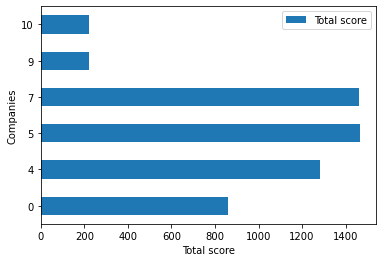

In [236]:
companies_final[["Name", "Total score"]].plot(kind="barh", xlabel = "Total score", ylabel = "Companies")
plt.show()

The winner is SERIOUS BUSINESS, although only for less than 5 points from the second one, Exent! This is weird, right?

Well, let's see at the visualization of both companies and their surroundings.